# Nueral Network Classification 
Classification is a problem of prediction whether something is one thing or another. 

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n{y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
[1 1 1 1 0]


In [5]:
# Make Dataframe of circle data
import pandas as pd 
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


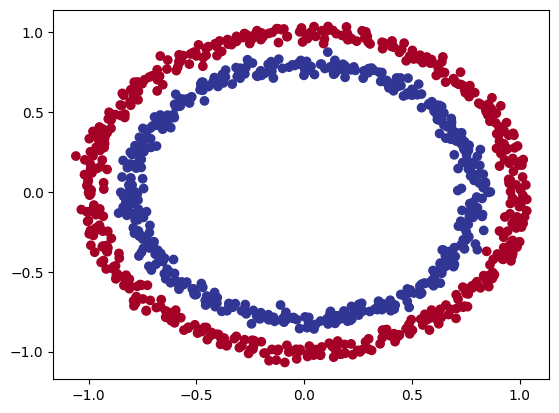

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(x= X[:,0],
            y= X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Toy Data:** Dataset that is small enough to experiment but sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# View the first sample of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test split

In [10]:
import torch

In [11]:
# Turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [14]:
n_samples

1000

## 2. Build a model
Build a code to identify red dots
1. Setup device agnostic code
2. Construct a model ( by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [16]:
X_train = X_train.to(device)

1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defining the `forward()` method that outlines the forward pass of the model.

In [17]:
from torch import nn 

In [18]:
# 1. Making a model with subclass `nn.Module`
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Defining 2 Linear layers
        self.layer1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales them to 5
        self.layer2 = nn.Linear(in_features=5, out_features=1) # takes 5 features from previous layer and returns 1
        
        ''' Replicating the model using torch.Sequential
        self.two_linear_layers =nn.Sequential(nn.Linear(in_features=2, out_features=5), nn.Linear(in_features=5, out_features=1))
        '''
    # 3. Defining the forward pass
    def forward(self, x):
        return self.layer2(self.layer1(x)) 
        '''return self.two_linear_layers(x)'''

In [19]:
model_0 = CircleModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.2151,  0.5143],
                      [ 0.1579,  0.4412],
                      [-0.1215, -0.0567],
                      [-0.1370,  0.3304],
                      [-0.6173, -0.3289]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.6636, -0.2206,  0.6503, -0.3094,  0.3633], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.3826,  0.2091,  0.3243, -0.4142, -0.1247]], device='cuda:0')),
             ('layer2.bias', tensor([0.1669], device='cuda:0'))])

### 2.1 Setup loss function and optimizer
Which loss function or optimizer should you use?

This is problem specific

1. For Regression:
    * MAE or MSE (Mean absolute error or mean squared error)
2. For Classification:
    * Binary Cross Entropy or Categorical Cross Entropy (Cross Entropy)

For optimizers most common ones are:
* SGD
* Adam

* Using `torch.nn.BECWithLogitsLoss()` as the loss function for out classifier
* Using 

In [20]:
# Defining the loss function
loss_fn = torch.nn.BCEWithLogitsLoss() # Comes with a built in sigmoid activation function

# Defining Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr= 0.1)

In [21]:
# Calculate accuracy - out of 100 models, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

### 3. Train the model
1. Forward Pass
2. Calculate the loss
3. Optimizer Zero Grad
4. Backward propagation
5. Optimizer Step

#### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
The models outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilites** by passing them into an aactivation function (Sigmoid Activation for binary classification and softmax activation for multiclass classification)

Then we convert the model's **probability predictions** to **prediction labels** by either rounding them or taking the `armax()`

In [22]:
# View the forst 5 outputs of the forward pass
model_0.eval()

with torch.inference_mode():
    y_logits = model_0(X_test.to(device)[:5])
y_logits

tensor([[ 0.2013],
        [ 0.3317],
        [-0.0417],
        [ 0.2698],
        [ 0.1150]], device='cuda:0')

In [23]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [24]:
# Use the sigmoid activation function on the raw logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5502],
        [0.5822],
        [0.4896],
        [0.5670],
        [0.5287]], device='cuda:0')

For the predictionf probability values we need to perform a range-style rounding on them:
* `y_preds_probs` >= 0.5 `y=1` (class 1)
* `y_preds_probs` < 5 > `y=0` (class 0)

In [25]:
# Find the predicted labels from the prediction probabilities
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred_probs -> pred_labes)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[0:5])))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of the extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 1.], device='cuda:0')

#### 3.2 Build the training amd testing loop

In [26]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Putting the code to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training ###
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # Turns logits -> pred probability -> pred labels

    # 2. Calculate Loss/ Accuracy
    '''loss = loss_fn(torch.sigmoid(y_logits)) # nn.BCELoss expects prediction possibilities as input'''
    loss = loss_fn(y_logits, y_train)   # nn.BCEWithLogitsLoss expects raw logits as inputs 
    acc = accuracy_fn(y_true= y_train, y_pred= y_pred)

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Loss Backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing ###
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the loss/ accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true= y_test, y_pred= test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.5f} | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}% | ")

Epoch: 0 | Loss: 0.69854, Accuracy: 54.00000 | Test Loss: 0.70640, Test Accuracy: 49.00% | 
Epoch: 10 | Loss: 0.69642, Accuracy: 53.12500 | Test Loss: 0.70414, Test Accuracy: 46.50% | 
Epoch: 20 | Loss: 0.69551, Accuracy: 52.12500 | Test Loss: 0.70282, Test Accuracy: 47.00% | 
Epoch: 30 | Loss: 0.69498, Accuracy: 51.50000 | Test Loss: 0.70180, Test Accuracy: 46.00% | 
Epoch: 40 | Loss: 0.69460, Accuracy: 51.12500 | Test Loss: 0.70094, Test Accuracy: 46.50% | 
Epoch: 50 | Loss: 0.69430, Accuracy: 51.12500 | Test Loss: 0.70019, Test Accuracy: 47.00% | 
Epoch: 60 | Loss: 0.69406, Accuracy: 51.00000 | Test Loss: 0.69954, Test Accuracy: 47.00% | 
Epoch: 70 | Loss: 0.69387, Accuracy: 50.87500 | Test Loss: 0.69898, Test Accuracy: 47.50% | 
Epoch: 80 | Loss: 0.69371, Accuracy: 51.00000 | Test Loss: 0.69849, Test Accuracy: 47.50% | 
Epoch: 90 | Loss: 0.69359, Accuracy: 51.00000 | Test Loss: 0.69807, Test Accuracy: 47.50% | 
Epoch: 100 | Loss: 0.69348, Accuracy: 51.00000 | Test Loss: 0.69769, Te

#### 4. Make Predictions
The model is not learning anything (basically guessing)

So to inspect it, visualizing the results

To do so we import `plot_decisions_boundries()`

In [27]:
import requests
from pathlib import Path 

# Download helper functions from learn PyTorch repo ( if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipped download")
else:
    print("Downloading helper_functions.py")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open("helper_functions.py", 'wb') as f:
        f.write(request.content)

helper_functions.py already exists, skipped download


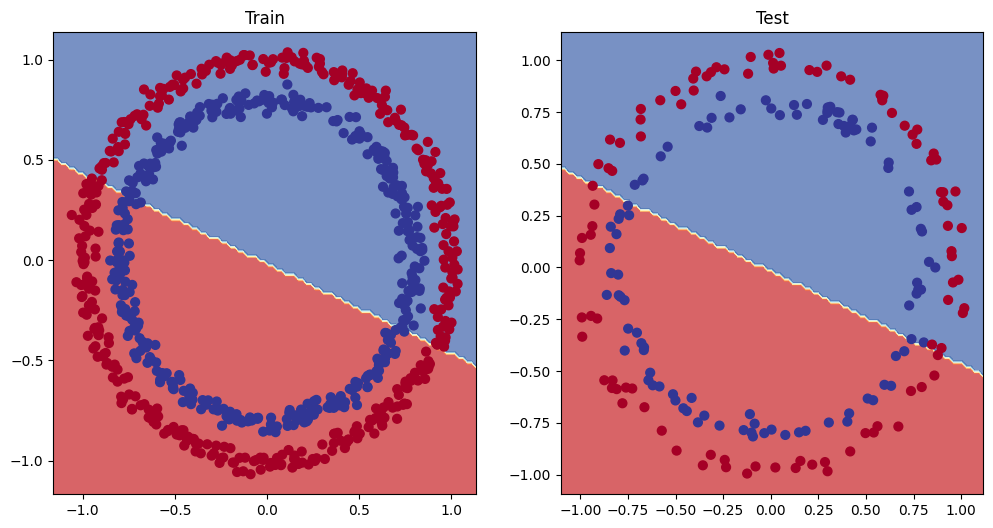

In [28]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improving the model(from a model's perspective)
* Add more layers - gives model more chances to learn about patters in the data
* Add more hidden layers - go from 5 hidden units to hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are from the model's perspective, because they deal directly with the model, rather than the data.

And because these options are all values we (as ML Engineers and data scientists) can change, they are called **hyperparameters**.

#### 5.1 Improving the model 
1. Adding more hidden layers: 5 -> 10
2. Increase the number of layers: 2-> 3
3. Increase the number of epochs: 100 -> 1000

In [29]:
class CircleModelV1(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features= 10)
        self.layer3 = nn.Linear(in_features=10, out_features=1) 

    def forward(self, x):
        # z = self.layer1(x)
        # z = self.layer2(z)
        # z = self.layer3(z) 
        return self.layer3(self.layer2(self.layer1(x))) # same as the above (commented) code but is computationally faster.   

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [30]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(), lr = 0.1)

In [31]:
# Writing the training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probability -> prediction label

    # 2. Calculate the loss/ accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true= y_train, y_pred= y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    ### Testing ###
    model_1.eval()

    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> pred probability -> prediction label
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true= y_test, y_pred= test_pred)

    # Print out what's happeening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Test Loss: {test_loss:.5f} | Accuracy: {acc:.2f}%, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Test Loss: 0.69261 | Accuracy: 50.88%, Test Accuracy: 51.00%
Epoch: 100 | Loss: 0.69305, Test Loss: 0.69379 | Accuracy: 50.38%, Test Accuracy: 48.00%
Epoch: 200 | Loss: 0.69299, Test Loss: 0.69437 | Accuracy: 51.12%, Test Accuracy: 46.00%
Epoch: 300 | Loss: 0.69298, Test Loss: 0.69458 | Accuracy: 51.62%, Test Accuracy: 45.00%
Epoch: 400 | Loss: 0.69298, Test Loss: 0.69465 | Accuracy: 51.12%, Test Accuracy: 46.00%
Epoch: 500 | Loss: 0.69298, Test Loss: 0.69467 | Accuracy: 51.00%, Test Accuracy: 46.00%
Epoch: 600 | Loss: 0.69298, Test Loss: 0.69468 | Accuracy: 51.00%, Test Accuracy: 46.00%
Epoch: 700 | Loss: 0.69298, Test Loss: 0.69468 | Accuracy: 51.00%, Test Accuracy: 46.00%
Epoch: 800 | Loss: 0.69298, Test Loss: 0.69468 | Accuracy: 51.00%, Test Accuracy: 46.00%
Epoch: 900 | Loss: 0.69298, Test Loss: 0.69468 | Accuracy: 51.00%, Test Accuracy: 46.00%


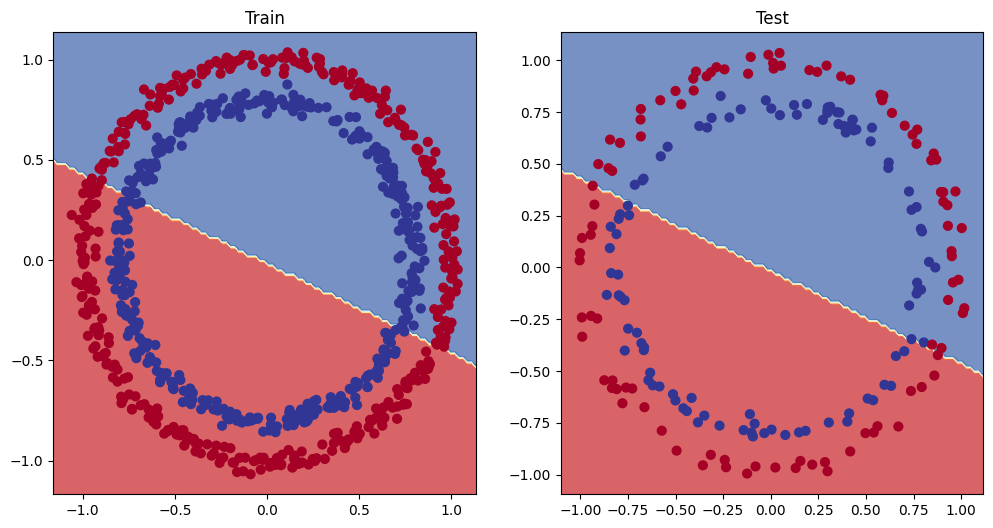

In [32]:
# Plot Decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.2 Testing if the model performs on a linear dataset

In [33]:
weight = 0.7
bias = 0.3

X_regression = torch.arange(0, 1 , 0.01).unsqueeze(dim =1)
y_regression = weight*X_regression + bias

In [34]:
X_train_regression, X_test_regression, y_train_regresssion, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state= 0)

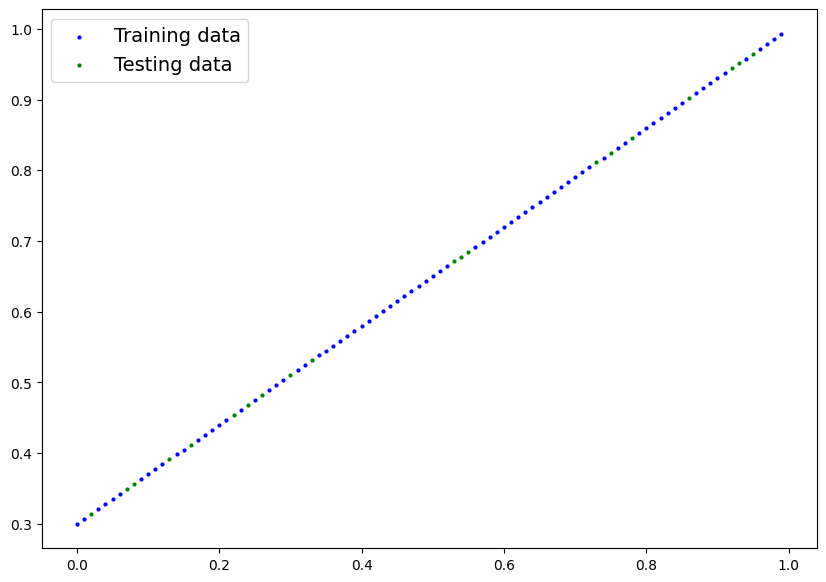

In [35]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regresssion,
                 test_data = X_test_regression,
                 test_labels= y_test_regression)

In [36]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_2.parameters(), lr=0.01)

In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression = X_train_regression.to(device)
X_test_regression = X_test_regression.to(device) 
y_train_regresssion = y_train_regresssion.to(device)
y_test_regression = y_test_regression.to(device)

for epoch in range(epochs):
    ### Training ###
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regresssion)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing ###
    model_2.eval()

    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.8013481497764587 | Test Loss: 0.7480317950248718
Epoch: 100 | Loss: 0.014379379339516163 | Test Loss: 0.025301098823547363
Epoch: 200 | Loss: 0.01236937940120697 | Test Loss: 0.025704234838485718
Epoch: 300 | Loss: 0.01389786135405302 | Test Loss: 0.022830834612250328
Epoch: 400 | Loss: 0.013507445342838764 | Test Loss: 0.021211860701441765
Epoch: 500 | Loss: 0.014094284735620022 | Test Loss: 0.02094649337232113
Epoch: 600 | Loss: 0.013372971676290035 | Test Loss: 0.020860817283391953
Epoch: 700 | Loss: 0.012542304582893848 | Test Loss: 0.01885363832116127
Epoch: 800 | Loss: 0.012638646177947521 | Test Loss: 0.02015485055744648
Epoch: 900 | Loss: 0.012618432752788067 | Test Loss: 0.019535621628165245


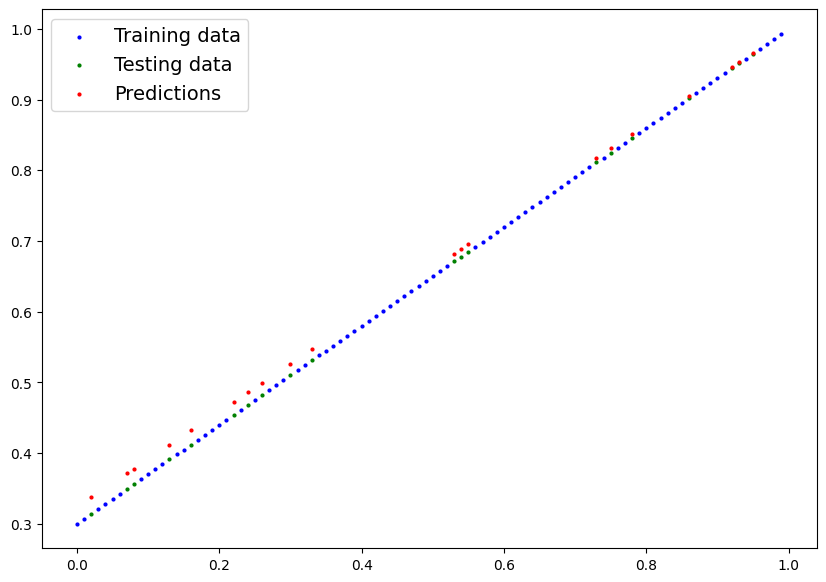

In [39]:
plot_predictions(X_train_regression.cpu(), y_train_regresssion.cpu(), X_test_regression.cpu(), y_test_regression.cpu(), predictions =test_pred.cpu())

### 6. Non Linearity
#### Recreating non-linear data  

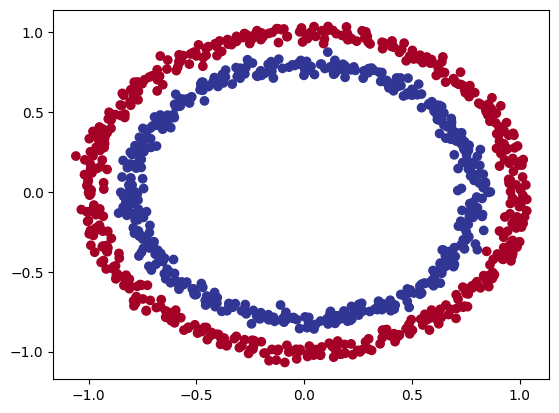

In [40]:
n_samples = 1000
X,y =make_circles(n_samples, noise= 0.03, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu)

In [41]:
# Convert data to tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 6.2 Building a model with non-linearity

In [42]:
# Build a model with non-linearity activation function

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # ReLU is a non-linear activation function

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [43]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [44]:
# Setup optmizer and loss
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)

#### 6.2 Training a model with non-linearity

In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train= X_train.to(device)
y_train= y_train.to(device)
X_test= X_test.to(device)
y_test= y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    ### Training ###
    model_3.train()

    # 1. Forward Pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred prob -> pred label

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred= y_pred)

    # 3. optim zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5 optim step
    optimizer.step()

    ### Testing ###
    model_3.eval()

    with torch.inference_mode():
        # Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, test_pred)
        test_acc = accuracy_fn(y_true=y_test, y_pred= test_pred)
    
    # Print What's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Test Loss: {test_loss:.4f} | Acc: {acc:.2f}%, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6929, Test Loss: 0.6821 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6925, Test Loss: 0.6853 | Acc: 50.38%, Test Acc: 50.00%
Epoch: 200 | Loss: 0.6922, Test Loss: 0.6879 | Acc: 59.00%, Test Acc: 56.00%
Epoch: 300 | Loss: 0.6921, Test Loss: 0.6891 | Acc: 70.12%, Test Acc: 67.00%
Epoch: 400 | Loss: 0.6919, Test Loss: 0.6894 | Acc: 68.38%, Test Acc: 70.00%
Epoch: 500 | Loss: 0.6918, Test Loss: 0.6891 | Acc: 58.50%, Test Acc: 62.00%
Epoch: 600 | Loss: 0.6917, Test Loss: 0.6884 | Acc: 54.00%, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6915, Test Loss: 0.6877 | Acc: 53.25%, Test Acc: 53.00%
Epoch: 800 | Loss: 0.6914, Test Loss: 0.6870 | Acc: 52.62%, Test Acc: 53.00%
Epoch: 900 | Loss: 0.6913, Test Loss: 0.6864 | Acc: 52.75%, Test Acc: 53.00%


#### 6.2 Testing the evaluated models

In [46]:
model_3.eval()

with torch.inference_mode():
    y_preds= torch.round(torch.sigmoid(model_3(X_test).squeeze()))


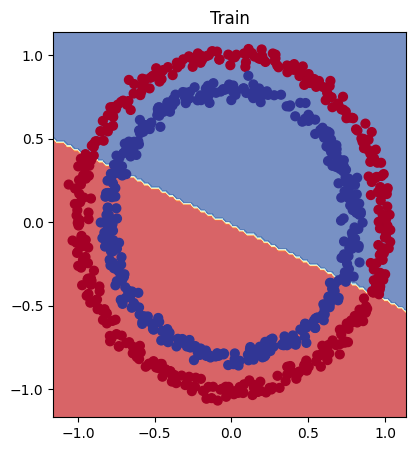

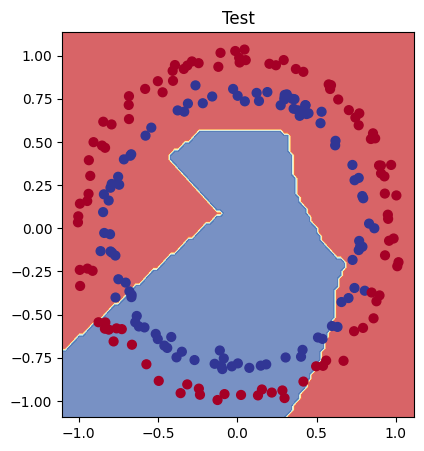

In [47]:
# Plot Decision boundries
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 7. Making a Multiclass Classification Model
#### 7.1 Making a toy dataset


tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


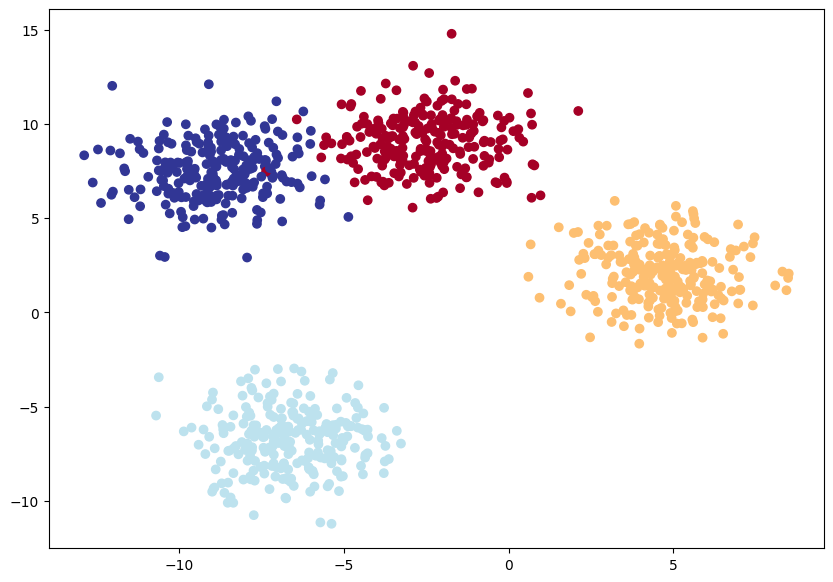

In [48]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [49]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [50]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [51]:
# model_4 = BlobModel(input_features =NUM_FEATURES, output_features= NUM_CLASS, hidden_units=8).to(device)

In [52]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1) # exercise: try changing the learning rate here and seein

In [53]:
model_4(X_blob_train.to(device)[:5])

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [54]:
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [55]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [56]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [57]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


#### 7.2 Getting prediction probabilities
In order to train and evaluate our model, we need to convert the output(logits) to prediction probabilities and then to prediction labels.

`Raw logits -> Pred Prob -> Pred Labels`

In [58]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


#### 7.3 Making predictions

In [59]:
model_4.eval()

with torch.inference_mode():
    y_preds = torch.softmax(model_4(X_blob_test), dim=1).argmax(dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

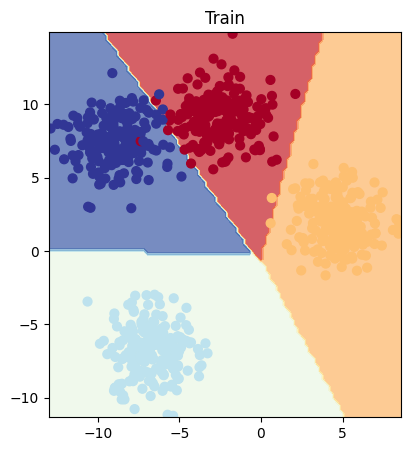

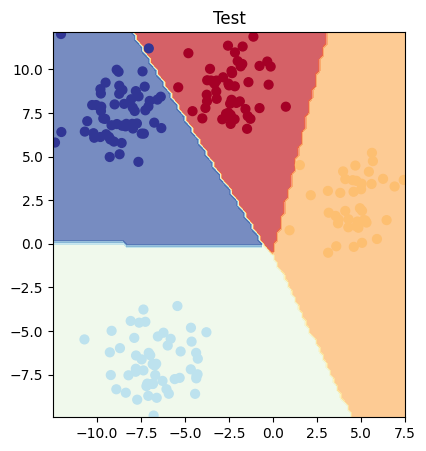

In [60]:
# Plot Decision boundries
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

#### 8. A few more classification metrics
* Accuracy
* Precision
* Recall
* Classification report
* Confusion matrix

In [61]:
from torchmetrics import Accuracy

#Setup metric
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

In [62]:
!pip uninstall TorchAudio